In [3]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [4]:
from data_augmentation_utils import shift, stretch, pitch_shift, add_noise

X = torch.load('waveform_ds/X_test.pt')
y = np.loadtxt('waveform_ds/y_test.txt', dtype=str)

In [5]:
def preprocess_function(examples):
    from transformers import AutoFeatureExtractor
    feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

    audio_arrays = [x.numpy() for x in examples]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=16000, truncation=True
    )
    return inputs

In [7]:
x_features = preprocess_function(X)
x_features = x_features['input_values']
x_features = np.array(x_features)

/Users/zattacole/anaconda3/envs/zatta/lib/python3.9/site-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


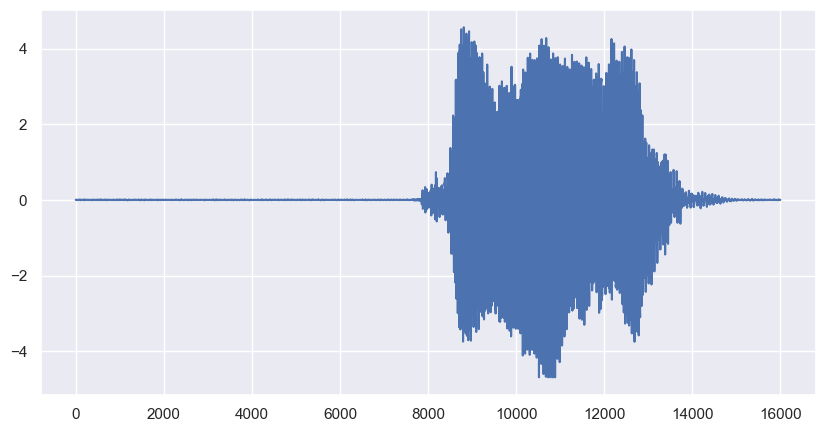

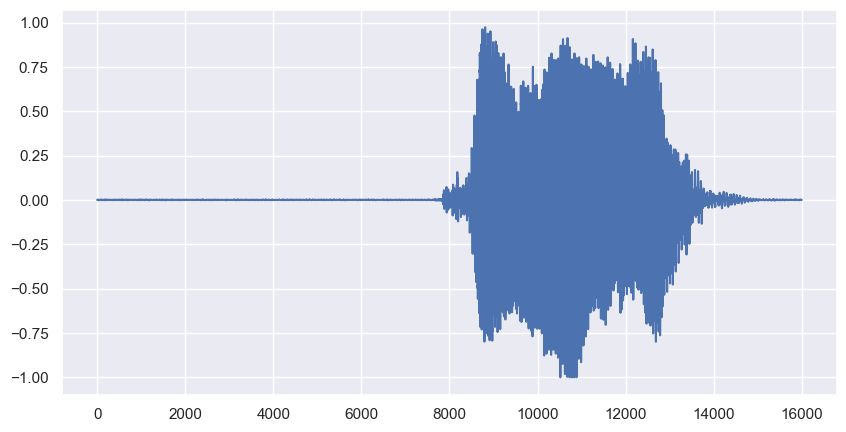

In [19]:
# plot x_features
i = 100
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_features[i])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X[i])
plt.show()

/var/folders/md/5pnpp0bj3tgdk4wgwzd07pbc0000gn/T/ipykernel_11363/161451558.py:9: UserWarning: 
The palette list has fewer values (10) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<Axes: >

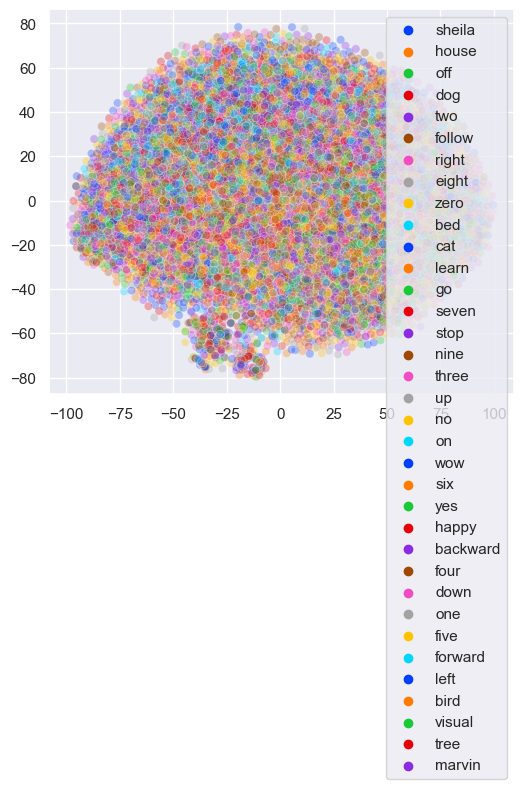

In [14]:
# use T-SNE to visualize the features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(x_features)

In [ ]:
# plot the 2d features, hue by label
plt.figure(figsize=(6, 5))
colors = sns.color_palette("bright", 10)
sns.scatterplot(
    x=X_2d[:,0], y=X_2d[:,1],
    hue=y, palette=colors,
    legend="full",
    alpha=0.3
)
